In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

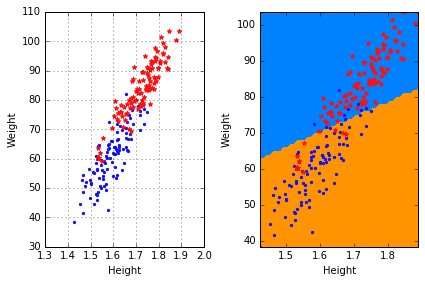

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # classify the data by linear regression:
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w,mse=least_squares(y,tx)
    # w = least squares with respect to tx
    

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1+np.exp(t))


In [17]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    a=0
    for n in range(y.shape[0]):    
        a+=np.log(1+np.exp(tx[n].T @ w))-y[n]*tx[n].T @ w
    return a[0]
tx = np.c_[np.ones((y.shape[0], 1)), x]
w,mse=least_squares(y,tx)
print(y.shape,tx.shape,w.shape)
calculate_loss(y,tx,w)

(200, 1) (200, 3) (3, 1)


115.39632273179164

In [18]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w)-y)
calculate_gradient(y,tx,w)

array([[ 22.05006961],
       [ 52.95436056],
       [ 61.3964863 ]])

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [19]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # compute the cost:
    loss=calculate_loss(y,tx,w)
    # compute the gradient:
    gradient=calculate_gradient(y,tx,w)
    # update w:
    w=w-gamma*gradient
    return loss, w

Demo!

Current iteration=0, the loss=138.6294361119893
Current iteration=1000, the loss=43.492582752039965
Current iteration=2000, the loss=41.55453651737653
Current iteration=3000, the loss=41.10170781312692
Current iteration=4000, the loss=40.96605044352831
Current iteration=5000, the loss=40.920561555036294
Current iteration=6000, the loss=40.904380183565785
Current iteration=7000, the loss=40.89842938170657
Current iteration=8000, the loss=40.89619782090306
Current iteration=9000, the loss=40.895351126990754
The loss=40.89502757990701


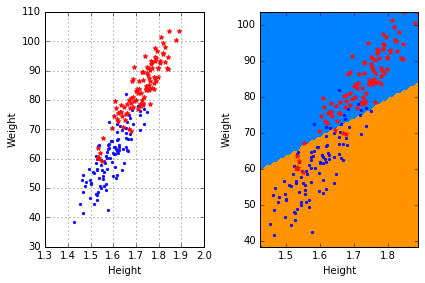

In [20]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [21]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # calculate hessian: 
    S=np.zeros((y.shape[0],y.shape[0]))
    for i in range(0,y.shape[0]):
        S[i,i]=sigmoid(tx[i].T @ w)*(1-sigmoid(tx[i].T @ w))
    return tx.T @ S @ tx
calculate_hessian(y,tx,w)

array([[ 45.41128773,   3.60647157,   4.25640398],
       [  3.60647157,  44.62864202,  40.74464575],
       [  4.25640398,  40.74464575,  43.81990579]])

Write a function below to return loss, gradient, and hessian.

In [22]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian:
    return calculate_loss(y,tx,w),calculate_gradient(y,tx,w),calculate_hessian(y,tx,w)
logistic_regression(y,tx,w)

(115.39632273179164, array([[ 22.05006961],
        [ 52.95436056],
        [ 61.3964863 ]]), array([[ 45.41128773,   3.60647157,   4.25640398],
        [  3.60647157,  44.62864202,  40.74464575],
        [  4.25640398,  40.74464575,  43.81990579]]))

### Using Newton method
Use Newton method for logistic regression.

In [23]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # return loss, gradient and hessian:
    loss,gradient,hessian = logistic_regression(y,tx,w)
    # update w:
    w=w-gamma * np.linalg.inv(hessian) @ gradient
    return loss, w

demo

Current iteration=0, the loss=138.6294361119893
Current iteration=500, the loss=40.964382792764724
Current iteration=1000, the loss=40.894828949093
The loss=40.89482608530335


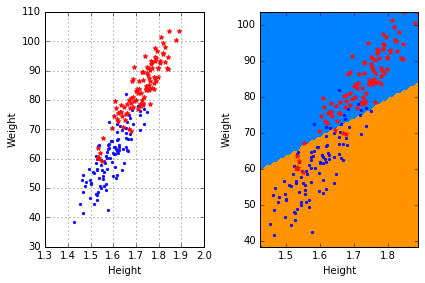

In [24]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [25]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian:
    loss,gradient,hessian=logistic_regression(y,tx,w)
    loss+= lambda_*np.sum(w*w)
    gradient+=lambda_*np.sum(2*w)
    hessian+=lambda_*2*w.shape[0]
    return loss,gradient,hessian

In [26]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # return loss, gradient and hessian:
    
    loss,gradient,hessian = penalized_logistic_regression(y,tx,w,lambda_)
    # update w:
    w=w-gamma * np.linalg.inv(hessian) @ gradient
    return loss, w

Current iteration=0, the loss=138.6294361119893
Current iteration=500, the loss=45.599298513710096
Current iteration=1000, the loss=45.88263569311312
Current iteration=1500, the loss=45.88670082469889
The loss=41.030652075126035


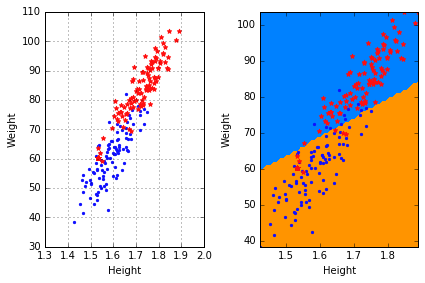

In [27]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)